<a href="https://colab.research.google.com/github/3-Ada/image_classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intel Image Classification

## Step 0: import dataset from Kaggle

In [6]:
from google.colab import files # library for working with files

In [7]:
files.upload() # upload kaggle.json from pc

!pip install -q kaggle # install kaggle API client

Saving kaggle.json to kaggle (1).json


In [8]:
#! mkdir ~/.kaggle # create folder with name .kaggle
! cp kaggle.json ~/.kaggle/ # move kaggle.json to created directory
! chmod 600 /root/.kaggle/kaggle.json # change permissions to more secure

In [9]:
! kaggle datasets download -d puneet6060/intel-image-classification

 98% 339M/346M [00:02<00:00, 139MB/s]
100% 346M/346M [00:02<00:00, 128MB/s]


In [10]:
! mkdir /content/image_files
! unzip intel-image-classification.zip -d /content/image_files

Streaming output truncated to the last 5000 lines.
  inflating: /content/image_files/seg_train/seg_train/mountain/7506.jpg  
  inflating: /content/image_files/seg_train/seg_train/mountain/7537.jpg  
  inflating: /content/image_files/seg_train/seg_train/mountain/7539.jpg  
  inflating: /content/image_files/seg_train/seg_train/mountain/7551.jpg  
  inflating: /content/image_files/seg_train/seg_train/mountain/7560.jpg  
  inflating: /content/image_files/seg_train/seg_train/mountain/7565.jpg  
  inflating: /content/image_files/seg_train/seg_train/mountain/7578.jpg  
  inflating: /content/image_files/seg_train/seg_train/mountain/7581.jpg  
  inflating: /content/image_files/seg_train/seg_train/mountain/7586.jpg  
  inflating: /content/image_files/seg_train/seg_train/mountain/7647.jpg  
  inflating: /content/image_files/seg_train/seg_train/mountain/7652.jpg  
  inflating: /content/image_files/seg_train/seg_train/mountain/7654.jpg  
  inflating: /content/image_files/seg_train/seg_train/mountai

## Step 1: explore the dataset

In [33]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [22]:
root_dir = "/content/image_files/seg_train/seg_train/"
sub_folders = os.listdir(root_dir)
labels = {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4,
          'street': 5}

data = []

for s, l in labels.items():
    for r, d, f in os.walk(root_dir + s):
        for file in f:
            if ".jpg" in file:
                data.append((os.path.join(s,file), l, s))

df_images_info = pd.DataFrame(data, columns=['file_name','label', 'category'])

In [23]:
df_images_info.head()

,file_name,label,category
0,buildings/12507.jpg,0,buildings
1,buildings/17594.jpg,0,buildings
2,buildings/13480.jpg,0,buildings
3,buildings/8054.jpg,0,buildings
4,buildings/8430.jpg,0,buildings


In [27]:
df_images_info.shape

(14034, 3)

The dataset contains 14 034 images.

Text(0.5, 1.0, 'Amount of images in each category')

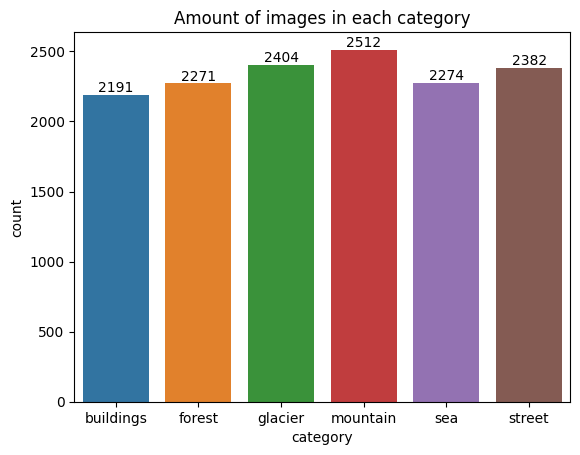

In [31]:
ax = sns.countplot(data=df_images_info, x='category')
ax.bar_label(ax.containers[0])
ax.set_title("Amount of images in each category")

As we can see, the dataset is pretty balanced.

In [39]:
len(df_images_info[df_images_info['category'] == 'forest'])

2271

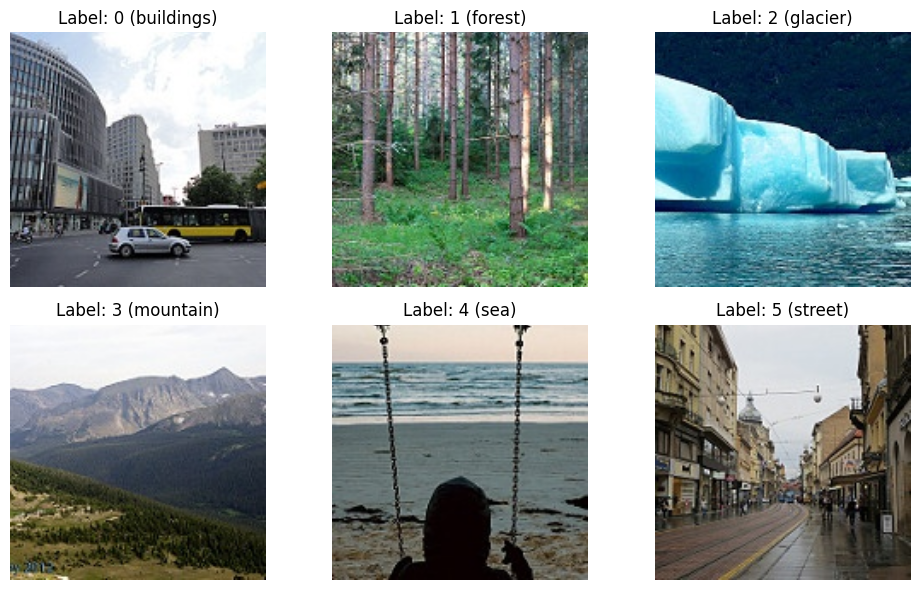

In [40]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

idx = 0
for i in range(2):
    for j in range(3):

        label = df_images_info.label[idx]
        category = df_images_info.category[idx]
        file_path = os.path.join(root_dir, df_images_info.file_name[idx])

        # Read an image with OpenCV
        image = cv2.imread(file_path)

        # Convert the image to RGB color space.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize image
        image = cv2.resize(image, (256, 256))

        ax[i,j].imshow(image)
        ax[i,j].set_title(f"Label: {label} ({category})")
        ax[i,j].axis('off')
        idx = idx+len(df_images_info[df_images_info['category'] == category])

plt.tight_layout()
plt.show()